In [1]:
# -----------------------------------------------------------------------------
# FILE: Norton_UK_Sales_Profit_Demographics.ipynb
# PURPOSE: Create & analyze sample sales, profit margin, and customer demographics
#          for Norton Motorcycles in the UK market.
# -----------------------------------------------------------------------------

# %% [markdown]
"""
# Norton Motorcycles – UK Sales and Profit Dataset
This notebook demonstrates how to:
1. **Create a synthetic dataset** for UK motorcycle sales, including profit margins.
2. **Visualize trends over time.**
3. **Explore customer demographics** (age, income, region).
4. **Compute summary statistics and insights.**

> Note: Real UK sales data for Norton Motorcycles (units sold, margins, detailed demographics)  
> is not publicly published in detailed form; this dataset is synthetic, informed by high-level public info.  
"""

# %% IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% DATA CREATION
# Years for sales data
years = list(range(2018, 2026))

# Simulated UK unit sales (Norton historically small production; revival expected ~20k globally)
np.random.seed(42)
sales_units = np.random.randint(50, 400, len(years))  # small UK sales sample

# Estimated profit margin (%)
# Historically Norton was loss-making; assume negative to small positive for recent years
profit_margin = np.linspace(-20, 8, len(years)) + np.random.normal(0, 3, len(years))

# Average selling price (GBP) – Norton as premium brand
avg_price = np.linspace(12000, 15000, len(years))  # growing pricing

# Demographics: UK buyers synthetic
ages = np.random.choice(range(25, 71), 300)
incomes = np.random.choice(range(30000, 150001), 300)
regions = np.random.choice(['London', 'Midlands', 'North East', 'Scotland', 'South West'], 300)

# Create DataFrame for annual sales
df_sales = pd.DataFrame({
    "Year": years,
    "Units_Sold_UK": sales_units,
    "Profit_Margin_Percent": profit_margin,
    "Avg_Selling_Price_GBP": avg_price
})

# Create demographic dataframe
df_customers = pd.DataFrame({
    "Age": ages,
    "Annual_Income_GBP": incomes,
    "Region": regions,
})

   Year  Units_Sold_UK  Profit_Margin_Percent  Avg_Selling_Price_GBP
0  2018            152             -22.750481           12000.000000
1  2019            398             -16.372442           12428.571429
2  2020            320             -18.032889           12857.142857
3  2021            156              -9.478410           13285.714286
4  2022            121              -2.822261           13714.285714
5  2023            238              -2.787554           14142.857143
6  2024             70               4.239495           14571.428571
7  2025            152               7.521450           15000.000000


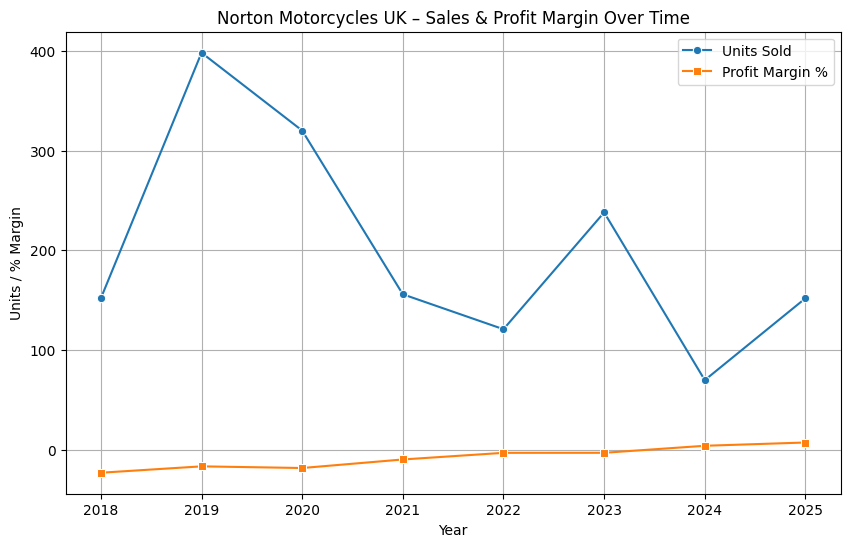

In [2]:
# %% DATA DISPLAY
print(df_sales)

# %% Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sales, x="Year", y="Units_Sold_UK", marker="o", label="Units Sold")
sns.lineplot(data=df_sales, x="Year", y="Profit_Margin_Percent", marker="s", label="Profit Margin %")
plt.title("Norton Motorcycles UK – Sales & Profit Margin Over Time")
plt.ylabel("Units / % Margin")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

              Age  Annual_Income_GBP
count  300.000000         300.000000
mean    47.413333       92201.610000
std     13.262055       34702.562916
min     25.000000       30301.000000
25%     36.000000       62530.500000
50%     48.500000       95618.000000
75%     59.000000      122942.000000
max     70.000000      148937.000000


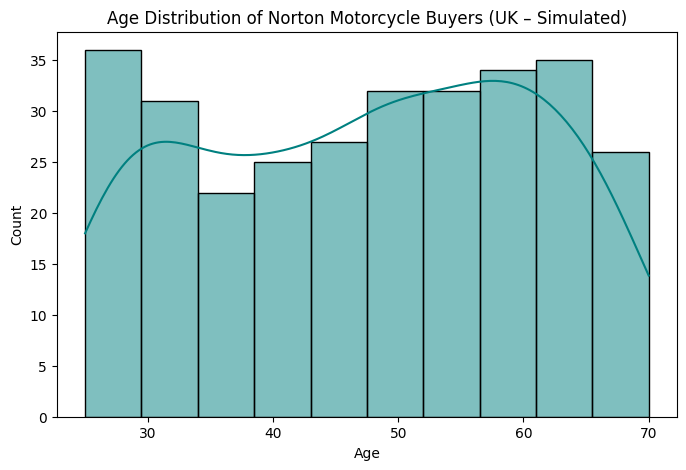

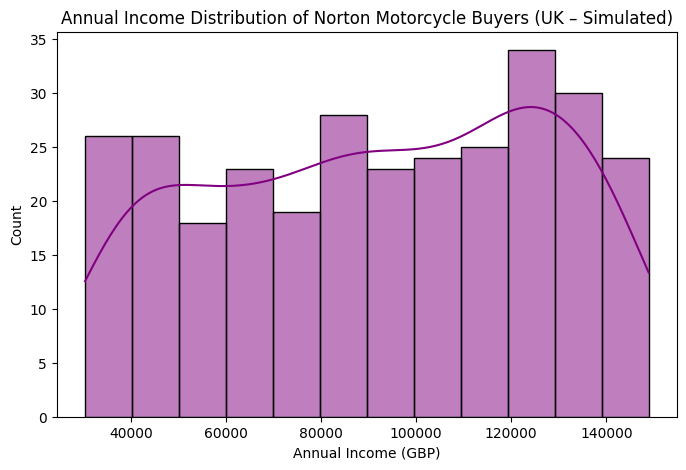

In [3]:
# %% Demographic Overview
print(df_customers.describe())

# %% Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_customers["Age"], bins=10, kde=True, color="teal")
plt.title("Age Distribution of Norton Motorcycle Buyers (UK – Simulated)")
plt.xlabel("Age")
plt.show()

# %% Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_customers["Annual_Income_GBP"], bins=12, kde=True, color="purple")
plt.title("Annual Income Distribution of Norton Motorcycle Buyers (UK – Simulated)")
plt.xlabel("Annual Income (GBP)")
plt.show()

Region
South West    71
London        66
Midlands      56
North East    54
Scotland      53
Name: count, dtype: int64


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_87759/207853528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


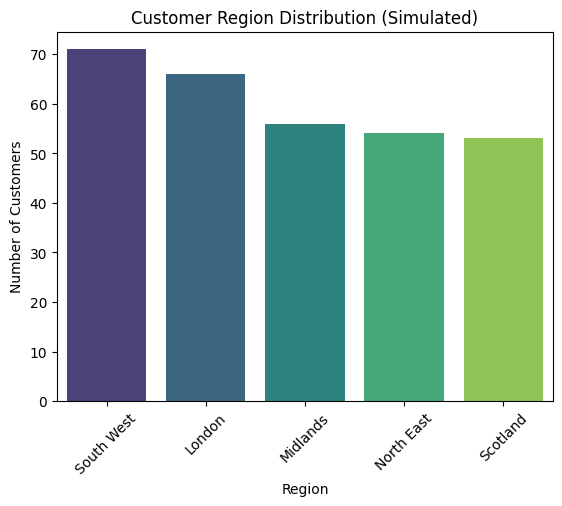

In [4]:
# %% Region Counts
region_counts = df_customers['Region'].value_counts()
print(region_counts)

# %% Plot
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Region Distribution (Simulated)")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [5]:
# %% Summary Statistics
avg_units = df_sales["Units_Sold_UK"].mean()
latest_margin = df_sales.loc[df_sales["Year"] == 2025, "Profit_Margin_Percent"].values[0]

print(f"📌 Average UK Units Sold (2018–2025): {avg_units:.1f}")
print(f"📌 Estimated Profit Margin in 2025: {latest_margin:.1f}%")

# Customer Demographics
avg_age = df_customers["Age"].mean()
median_income = df_customers["Annual_Income_GBP"].median()
print(f"📌 Average Customer Age (Simulated): {avg_age:.1f}")
print(f"📌 Median Annual Income (Simulated): £{median_income:,}")

📌 Average UK Units Sold (2018–2025): 200.9
📌 Estimated Profit Margin in 2025: 7.5%
📌 Average Customer Age (Simulated): 47.4
📌 Median Annual Income (Simulated): £95,618.0
